<a href="https://colab.research.google.com/github/mohamed222257/projet-python/blob/main/analyse_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact,widgets
import folium

In [ ]:
# Importer les données
deces_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirme_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
retabli_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
etat_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [ ]:
print(deces_df.shape)
print(confirme_df.shape)
print(retabli_df.shape)
print(etat_df.shape)

(264, 97)
(264, 97)
(250, 97)
(185, 14)


In [ ]:
etat_df.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-04-24 09:31:37,-25.0000,133.0000,6661,75,4124,2462,26.162916,NaN,NaN,1.125957,36,AUS
1,Austria,2020-04-24 09:30:31,47.5162,14.5501,15002,522,11872,2608,166.570439,NaN,NaN,3.479536,40,AUT
2,Canada,2020-04-24 09:31:20,60.0010,-95.0010,43286,2241,14761,26284,114.344729,NaN,NaN,5.177194,124,CAN
3,China,2020-04-24 06:54:42,30.5928,114.3055,83884,4636,77997,1251,5.971767,NaN,NaN,5.526680,156,CHN
4,Denmark,2020-04-24 09:30:31,56.0000,10.0000,8408,394,5573,2441,145.160658,NaN,NaN,4.686013,208,DNK
5,Finland,2020-04-24 09:30:31,61.9241,25.7482,4284,172,2000,2112,77.318499,NaN,NaN,4.014939,246,FIN
6,France,2020-04-24 09:30:31,46.2276,2.2137,159467,21889,42773,94805,244.305837,NaN,NaN,13.726351,250,FRA
7,Germany,2020-04-24 09:30:31,51.1657,10.4515,153129,5575,106800,40754,182.766519,NaN,NaN,3.640721,276,DEU
8,Iceland,2020-04-24 09:30:31,64.9631,-19.0208,1789,10,1509,270,524.249084,NaN,NaN,0.558971,352,ISL
9,Ireland,2020-04-24 09:30:31,53.1424,-7.6921,17607,794,9233,7580,356.576092,NaN,NaN,4.509570,372,IRL


In [ ]:
country=['China','Germany','Morocco']
etat_df[etat_df['Country_Region'].isin(country)]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
3,China,2020-04-24 06:54:42,30.5928,114.3055,83884,4636,77997,1251,5.971767,NaN,NaN,5.526680,156,CHN
7,Germany,2020-04-24 09:30:31,51.1657,10.4515,153129,5575,106800,40754,182.766519,NaN,NaN,3.640721,276,DEU
123,Morocco,2020-04-24 09:30:31,31.7917,-7.0926,3568,155,456,2957,9.666611,NaN,NaN,4.344170,504,MAR


In [ ]:
etat_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [ ]:
# Afficher les statistiques au niveau monde
global_data=etat_df.copy().drop(['Country_Region','Last_Update', 'Lat', 'Long_','Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],axis=1)
global_synthese=pd.DataFrame(global_data.sum()).transpose()
global_synthese

,Confirmed,Deaths,Recovered
0,1999628,128011,500996


In [ ]:
# Visualiser les pays les plus touchés
fig=go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r='background-color:red'
  y='background-color:purple'
  g='background-color:grey'
  df1=pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,4]=y
  df1.iloc[:,5]=r
  df1.iloc[:,6]=g

  return df1

def show_cases(n):
  n=int(n)
  return etat_df.sort_values('Confirmed',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases,n='10')

ipywLayout=widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig],layout=ipywLayout)


interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [ ]:
etat_class_df= etat_df.sort_values('Confirmed',ascending=False)
etat_class_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [ ]:
etat_class_df.columns
px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Confirmed',
  title='Les 10 pays les plus touchés par coronavirus (cas confirmés)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [ ]:
etat_class_df.columns
px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Deaths',
  title='Les 10 pays les plus touchés par coronavirus (cas decès)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [ ]:
etat_class_df.columns
px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Recovered',
  title='Les 10 pays les plus touchés par coronavirus (cas rétablis)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [ ]:
# Visualiser les données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
for i in range(0,len(confirme_df)):
  folium.Circle(
      location=[confirme_df.iloc[i]['Lat'],confirme_df.iloc[i]['Long']],
      fill=True,
      radius=(int((np.log(confirme_df.iloc[i,-1]+1.00001)))+0.2)*50000,
      color='red',
      fill_color='indigo',
      tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirme_df.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirme: "+str(confirme_df.iloc[i,-1])+"</li>"+
                        "<li>Deces:   "+str(deces_df.iloc[i,-1])+"</li>"+
                        "<li>Taux de mortalite: "+ str(np.round(deces_df.iloc[i,-1]/(confirme_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(m)
m


In [ ]:
# Visualiser la situation dans un pays (maroc)
conf_mar=confirme_df[confirme_df['Country/Region']=='Morocco']
deces_mar=deces_df[deces_df['Country/Region']=='Morocco']
retabli_mar=retabli_df[retabli_df['Country/Region']=='Morocco']

In [ ]:
# Préparation des donées (MAroc)
conf_mar=conf_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
deces_mar=deces_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
retabli_mar=retabli_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

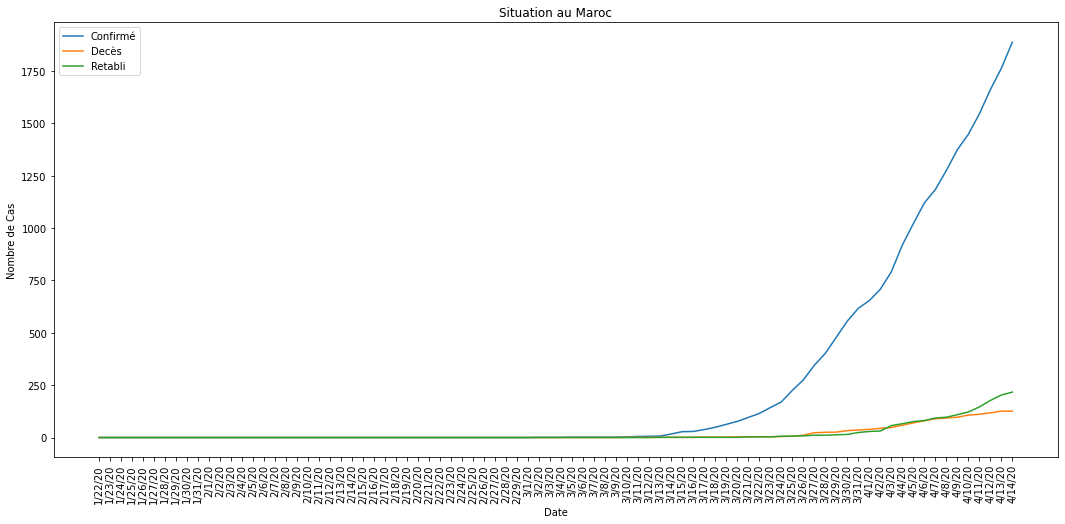

In [ ]:
# Dessin de la courbe
fig,ax=plt.subplots(figsize=(18,8))
ax.plot(conf_mar.index,conf_mar.values,label='Confirmé')
ax.plot(deces_mar.index,deces_mar.values,label='Decès')
ax.plot(retabli_mar.index,retabli_mar.values,label='Retabli')

plt.xticks(rotation='vertical')
ax.set(xlabel='Date',ylabel='Nombre de Cas',title='Situation au Maroc')
plt.legend()